We've focused entirely on summarizing distributions using 
* the mean, 
* the weighted mean, 
* the median, and 
* the mode. 

An interesting distribution property we haven't yet discussed is **variability**.

In [1]:
A = [4,4,4,4]
B = [0,8,0,8]

* The values of the distribution A don't vary — each value is 4. 
* The values in distribution B show some variability — they are not all identical, and the values can be either 8 or 0. 

If we were to quantify variability, we could assign a value of `0` to **A** to indicate that it has no variability. But what variability value should we assign to distribution B?

We need a measure to summarize the variability of these two distributions. 
* The summary metrics we've learned so far don't tell us anything about variability. 
* The **mean**, the **median**, and the **mode** of distribution **A** are all `4`, and distribution **B** has a **mean** and a **median** of `4`, and **two mode** i.e (`0` and `8`). 

If we were to judge variability based on these values, we'd probably have to conclude that the variabilities of the two distributions are equal, which is wrong.

One intuitive way to measure the variability of a distribution is to find the difference between the maximum and the minimum value. 
* Both the maximum and the minimum of distribution A is 4, so the variability of distribution A is 0 (4-4)

We call this measure of variability **the range**. 
* So the range of distribution **A** is `0`. 
* The range of distribution **B** is `8 (8-0)`.

So, we can say range distribution of **X**, can be any distribution of real numbers, is;
$$range(X) = max(X)- min(X)$$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

houses = pd.read_table("AmesHousing_1.txt")
houses.shape

(2930, 82)

In [3]:
# function that takes in an array of numerical values and returns the range of that array

def range_col(col):
    max_val = col.max()
    min_val = col.min()
    range_col = max_val - min_val
    return range_col

In [4]:
# measure the range of the SalePrice variable for each year of sales

range_by_year = {}
years = houses["Yr Sold"].unique()

for year in years:
    df = houses[houses["Yr Sold"] == year]
    sale_price = df["SalePrice"]
    year_range = range_col(sale_price)
    range_by_year[year] = year_range

range_by_year

{2010: 598868, 2009: 575100, 2008: 601900, 2007: 715700, 2006: 590000}

In [33]:
# alternate of above
# houses.groupby("Yr Sold")["SalePrice"].agg(range_col).sort_index(ascending = False)
# houses.pivot_table(index = "Yr Sold", values = "SalePrice",aggfunc= range_col).sort_index(ascending = False)

Prices has the greatest variability in **2007**.

The problem with the range is that it considers only two values in the distribution — the minimum and the maximum value. Let say we have a distribution C
$$C = [1,1,1,1,1,1,1,1,1,21]$$

We can see there's not much variability in distribution C - we have nine values of 1, and a single value of 21

$$21-1 = 20$$

Despite our expectations, the range indicates that the variability of distribution **C** is `20`.

This is significantly greater than 0 and doesn't seem like a reasonable measure of variability for distribution C. The root of the problem is that the range considers only the two extreme values, and this makes it extremely sensitive to outliers. To get a more balanced measure of variability for distribution C, we need to take into account each value in the distribution.

To take into account each value when measuring variability we could take a reference value, and measure the distance of each value in the distribution from that reference value.
* We can take the mean of the distribution as a reference value.
* Then, we measure the distance between each value in the distribution and the mean.

By measuring the distance of each value relative to a reference point and then taking the mean of the distances, we practically measure how much the values of a distribution vary on average with respect to that reference point.

In [5]:
# function that takes in a numerical array and returns the average distance 

def average_distance(array):
    mean = np.mean(array)
    distance = []
    for i in array:
        distance.append(i-mean)
    average_distance = np.average(distance)
    return average_distance

c=[1,1,1,1,1,1,1,1,1,21]
average_distance(c)

0.0

The **mean** is the balance point of a distribution. 
* So, total distance of all values below and above the mean are same. 
* That being said sum of all negative values (below mean) plus sum of all postive value (abvove mean) should be zero

To solve this problem, we can take the absolute value of each distance, and then sum up the absolute values. The **absolute value (also called modulus)** of a number is the positive version of that number, regardless of its sign.

We'll update the formula used previously to reflect the fact the we're summing up the absolute distances instead:

In [6]:
def mean_absolute_deviation(array):
    mean = np.mean(array)
    distance = []
    for i in array:
        distance.append(abs(i-mean)) # Also can use np.abs() or np.fabs()
    average_distance = np.average(distance)
    return average_distance

c=[1,1,1,1,1,1,1,1,1,21]
mean_absolute_deviation(c)

3.6

The values of a distribution **C** vary on average with respect to `mean (3.0)` by `3.6`.

Another way to solve this problem is to square each distance and then find the mean of all the squared distances

This measure of variability is sometimes called **mean squared distance or mean squared deviation** (remember that "distance" and "deviation" are synonymous in this context). However, it's more commonly known as **variance**.

Squaring the distances or taking their absolute values ensure that we get a variability value that is greater than 0 for all distributions that show some variability. Notice, however, that variance and mean absolute deviation will still be 0 for distributions that show no variability.

We got a mean absolute deviation of 3.6 for our distribution **c**. A value of 3.6 fitted well our expectations because we had expected a variability value greater than 0, but significantly less than 20. 

In [7]:
# function that takes in a numerical array and returns the variance of that array.

def variance(array):
    mean = np.mean(array)
    distance = []
    for i in array:
        distance.append((i-mean)**2) 
    average_distance = np.average(distance)
    return average_distance

c=[1,1,1,1,1,1,1,1,1,21]
variance(c)

36.0

We got a variance of 36 for distribution **c** which was much more than we had expected. This high variability value is the direct result of the squaring process, which makes most distances much bigger than they actually are.

**Squaring the distances** also has the drawback of **squaring the units of measurement**. For computational purposes, and sometimes for simplicity, we tend to leave out the units of measurement in practice, but theoretically we should write out the units of measurement

To solve this problem and also reduce the variability value, we can take the square root of variance. The square root of variance is called **standard deviation** (remember that "deviation" is synonymous with "distance"). 
* Standard deviation is simply the square root of variance

In [8]:
# function that takes in a numerical array and returns the standard deviation of that array


def standard_deviation(array):
    mean = np.mean(array)
    distance = []
    for i in array:
        distance.append((i-mean)**2) # Also can use np.abs() or np.fabs()
    average_distance = (np.average(distance))**(1/2) # or np.sqrt(np.average(distance))
    return average_distance

c=[1,1,1,1,1,1,1,1,1,21]
standard_deviation(c)

6.0

Standard deviation is perhaps the most used measure of variability

In [9]:
standard_deviation(houses['SalePrice'])

79873.05865192253

Standard deviation tells us how much the values in a distribution vary (on average) around the mean of that distribution.

In [10]:
print(houses['SalePrice'].mean())

180796.0600682594


The mean tells us that the average price of a house is roughly `$180,796`, but this doesn't mean that each house (or most of them) costs exactly `$180,796`. 
* One house could cost `$120,000`, another `$240,000`, and it could be that no house actually costs exactly `$180,796`. 
* The standard deviation gives us a picture about this variability around the mean sale price. So, on average, sale prices vary by roughly `$79,873` above and below a mean of `$180,796`.

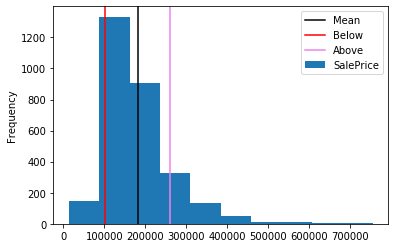

In [11]:
mean = houses['SalePrice'].mean()
st_dev = standard_deviation(houses['SalePrice'])
houses['SalePrice'].plot.hist()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean - st_dev, color = 'Red', label = 'Below')
plt.axvline(mean + st_dev, color = 'Violet', label = 'Above')
plt.legend()

Notice in the histogram that prices can vary around the mean much more or much less than `$79,873`. 
* Some outliers around `$700,000` are more than `$500,000` above the mean and a couple of houses around `$30,000` are more than `$150,000` below the mean. 

The standard deviation doesn't set boundaries for the values in a distribution: the prices can go above and below the mean more than `$79,873`.

In [12]:
# Find the year with the greatest and lowest variability of prices

year_deviations = {}

for year in years:
    df = houses[houses['Yr Sold'] == year]
    std_dev =  standard_deviation(df['SalePrice'])
    year_deviations[year] = std_dev

year_deviations

greatest_variability = max(year_deviations, key = year_deviations.get)
lowest_variability = min(year_deviations, key = year_deviations.get)

print({"greatest_variability":greatest_variability, "lowest_variability":lowest_variability})

{'greatest_variability': 2006, 'lowest_variability': 2010}


Another way to understand standard deviation is as a measure of spread in a distribution — values in a distribution can be more or less spread.

In [13]:
# samples of 50 sample points each from the distribution of the Year Built variable

sample1 = houses["Year Built"].sample(50, random_state = 1)
sample2 = houses["Year Built"].sample(50, random_state = 2)

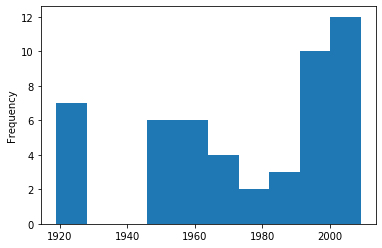

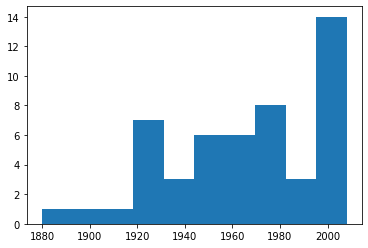

In [14]:
sample1.plot.hist()
plt.show()
plt.hist(sample2)
plt.show()

sample2 has a bigger spread than sample1

In [15]:
# computing and comparing the standard deviations of the two samples

std_sample1 = standard_deviation(sample1)
std_sample2 = standard_deviation(sample2)

print({"std_sample1":round(std_sample1,2),"std_sample2":round(std_sample2,2)})

{'std_sample1': 29.24, 'std_sample2': 32.47}


The standard deviations of these two sample distributions fit our visual estimates fairly well

In practice, we generally work with samples, but most of the time we're not actually interested in describing the samples. Rather, we want to use the samples to make inferences about their corresponding populations.

In [16]:
population = houses['SalePrice']
parameter = standard_deviation(population)
parameter

79873.05865192253

In [17]:
statistic = []
for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state = i)
    std_dev = standard_deviation(sample)
    statistic.append(std_dev)


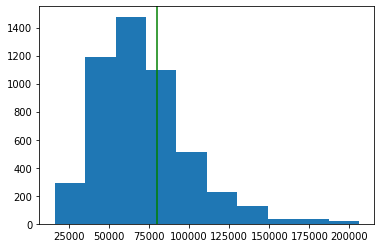

In [18]:
plt.hist(statistic)
plt.axvline(parameter, color = "Green")
plt.show()

Most sample standard deviations are clustered below the population standard deviation. This suggests that the sample standard deviation usually underestimates the population standard deviation.

In [19]:
print(sum(statistic) /len(statistic))

71303.64762671624


We can also see that the mean of the 5000 sample standard deviations is below the population standard deviation

So we can say that the sample standard deviation underestimates on average the population standard deviation. Some sample standard deviations are lower than the population standard deviation, some are greater, some may even be equal to the population standard deviation, but on average the sample standard deviation is lower than the population standard deviation.

We can get a good intuition for why the sample standard deviation underestimates if we think in terms of distribution spread. When we sample a population, it's generally more likely to get a sample with a spread that's lower than the population's spread. This generally translates to a lower standard deviation than in the population.

Getting a sample with a higher standard deviation than in the population is possible, but this is less likely. This is mostly specific to samples with a high spread and no clusters.

To correct the underestimation problem, we can try to slightly modify the sample standard deviation formula to return higher values. 
* One way to do that is to decrease the value of the denominator. If we decrease the value of the denominator, we get a greater result. 
* We'll decrease by 1 the denominator in the sample standard deviation formula.

This small correction we added to the sample standard deviation (dividing by n-1 instead of n) is called **Bessel's correction**. 

In [20]:
# Bessel's correction standard_deviation for samples

def standard_deviation(array):
    mean = np.mean(array)
    distance = []
    for i in array:
        distance.append((i-mean)**2) 
    average_distance = sum(distance)/(len(distance)-1)
    return np.sqrt(average_distance)

In [21]:
statistic = []
for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state = i)
    std_dev = standard_deviation(sample)
    statistic.append(std_dev)


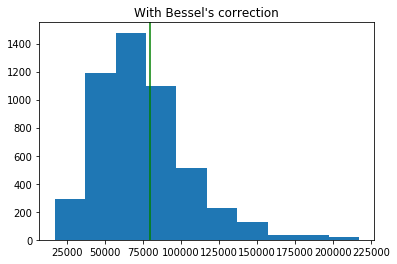

In [22]:
plt.hist(statistic)
plt.axvline(parameter, color = "Green")
plt.title("With Bessel's correction")
plt.show()

It looks like Bessel's correction added some visible improvements and partially corrected the underestimation problem

In [23]:
print(sum(statistic) /len(statistic))

75160.6439928273


The improvement brought by Bessel's correction is more obvious when we compare the average values of the two distributions above. 
* The mean of the 5000 sample standard deviations without Bessel's correction is roughly 71304, while
* The mean standard deviation of the sample standard deviations having the correction is roughly 75161. 

This is significantly closer to the population standard deviation, which is approximately 79873.

We could decrease the denominator more (dividing by n-2 or n-3 etc) to try improving the correction. However, Statisticians agree that n-1 is the best choice for the sample standard deviation formula

Now that we know what formulas to use for samples and populations. 
* The population standard deviation is denoted with the Greek letter **б** (read "sigma", or "lowercase sigma").
* Remember that the population standard deviation  is just the square root of the population variance.
* The sample standard deviation is simply denoted with **s**.

The main takeaway is that we need to use the 
* Standard Deviation or variance formulae with Bessel's correction for samples. 
* For populations, we can use the standard Deviation or variance formulae without Bessel's correction.

In [24]:
sample = houses.sample(100, random_state = 1)
from numpy import std, var 

pandas_stdev = sample["SalePrice"].std(ddof = 1) # n-1
numpy_stdev = std(sample["SalePrice"], ddof = 1)

equal_stdevs = pandas_stdev == numpy_stdev
print(equal_stdevs)

pandas_var = sample["SalePrice"].var(ddof = 1)
numpy_var = var(sample["SalePrice"], ddof = 1)

equal_vars = pandas_var == numpy_var 
print(equal_vars)

True
True


We stated that statisticians agree that n-1 is better than n or n-2 for computing the sample standard deviation .An argument supporting this comes from the fact that the sample variance (which uses n-1 ) is an unbiased estimator for the population variance . Since standard deviation is just the square root of variance, it makes sense to use n-1 as well (although standard deviation is not an unbiased estimator

When we discussed the mean, we call a statistic an unbiased estimator when that statistic is equal on average to the parameter it estimates. Remember that the sample mean is an unbiased estimator for the population mean no matter whether we sample with or without replacement.

The sample variance  is an unbiased estimator for the population variance  only when we sample with replacement.

In [25]:
population = [0, 3, 6]

# samples of size n = 2 for the population [0, 3, 6] when we sample with replacement

samples = [[0,3], [0,6],[0,0],
           [3,0], [3,6],[3,3],
           [6,0], [6,3],[6,6]
          ]

st_devs = []
variances = []

for sample in samples:
    st_devs.append(std(sample,ddof = 1)) # using numpy
    variances.append(var(sample,ddof = 1)) # using numpy

mean_std = np.average(st_devs)
mean_var = np.mean(variances)

pop_var = var(population)
pop_std = std(population)

equal_stdev = pop_std == mean_std
equal_var = pop_var == mean_var

print(equal_stdev)
print(equal_var)


False
True


In [26]:
population = [0, 3, 6]

# samples of size n = 2 for the population [0, 3, 6] when we sample without replacement

samples = [[0,3], [0,6],
           [3,0], [3,6],
           [6,0], [6,3]
          ]


st_devs = []
variances = []
for sample in samples:
    st_devs.append(std(sample,ddof = 1)) # using numpy
    variances.append(var(sample,ddof = 1)) # using numpy

mean_std = np.average(st_devs)
mean_var = np.mean(variances)

pop_var = var(population)
pop_std = std(population)

equal_stdev = pop_std == mean_std
equal_var = pop_var == mean_var

print(equal_stdev)
print(equal_var)

False
False
